# Exploration of Reddit posts collected

In [1]:
import pickle as pkl
import os
import datetime
import matplotlib.pyplot as plt

In [2]:
submission_files = os.listdir("./data/submissions")
sub_obj_list = []
for file in submission_files:
    sub_obj_list.append(pkl.load(open("./data/submissions/"+file, "rb")))

## Count of posts by Subreddit

[13, 5, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


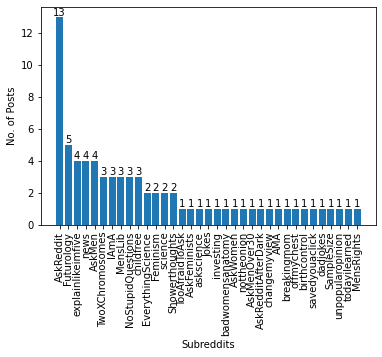

<Figure size 14400x14400 with 0 Axes>

In [3]:
subreddit_count = {}

for submission in sub_obj_list:
    if submission.subreddit.display_name not in subreddit_count:
        subreddit_count[submission.subreddit.display_name] = 1
    else:
        subreddit_count[submission.subreddit.display_name] += 1

subreddit_count = {k: v for k, v in sorted(subreddit_count.items(), key=lambda item: item[1], reverse=True)}

subreddit_list = list(subreddit_count.keys())
subreddit_count = list(subreddit_count.values())

print(subreddit_count)

fig, ax = plt.subplots()

sub_bar = ax.bar(subreddit_list, subreddit_count)
ax.set_xlabel("Subreddits")
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel("No. of Posts")
ax.bar_label(sub_bar)
plt.figure(figsize=(200,200))
plt.show()

## Count of Posts by year

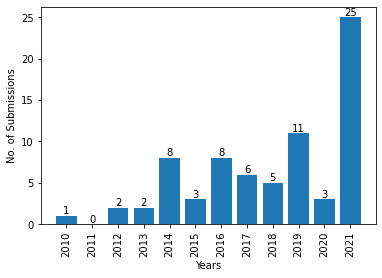

In [4]:
sub_year_count = {}

for submission in sub_obj_list:
    sub_year = datetime.datetime.fromtimestamp(submission.created_utc).year

    if sub_year not in sub_year_count:
        sub_year_count[sub_year] = 1
    else:
        sub_year_count[sub_year] += 1

sub_years = range(min(sub_year_count), max(sub_year_count)+1, 1)

sub_counts = []
for year in sub_years:
    if year in sub_year_count:
        sub_counts.append(sub_year_count[year])
    else:
        sub_counts.append(0)

fig1, ax1 = plt.subplots()

sub_year_bar = ax1.bar(sub_years, sub_counts)
ax1.set_xlabel("Years")
ax1.set_xticks(sub_years)
ax1.tick_params(axis='x', labelrotation = 90)
ax1.set_ylabel("No. of Submissions")
ax1.bar_label(sub_year_bar)

plt.show()

## Count of Comments by Year

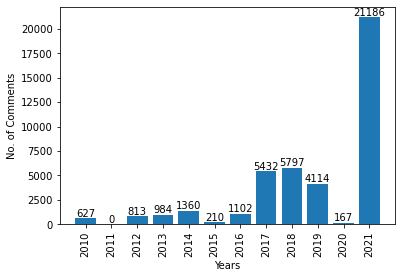

In [5]:
com_year_count = {}

for submission in sub_obj_list:
     for comment in submission.comments.list():
        com_year = datetime.datetime.fromtimestamp(comment.created_utc).year
        if com_year not in com_year_count:
            com_year_count[com_year] = 1
        else:
            com_year_count[com_year] += 1
            
com_years = range(min(com_year_count), max(com_year_count)+1)

com_counts = []
for year in com_years:
    if year in com_year_count:
        com_counts.append(com_year_count[year])
    else:
        com_counts.append(0)
        
fig2, ax2 = plt.subplots()

com_year_bar = ax2.bar(com_years, com_counts)
ax2.set_xlabel("Years")
ax2.set_xticks(com_years)
ax2.tick_params(axis='x', labelrotation = 90)
ax2.set_ylabel("No. of Comments")
ax2.bar_label(com_year_bar)

plt.show()